📦 Sales Summary Table


,product,total_qty,revenue
0,Eraser,20,20.0
1,Marker,7,70.0
2,Notebook,5,100.0
3,Pen,10,50.0
4,Pencil,15,30.0


C:\Users\91743\AppData\Local\Temp\ipykernel_22504\3538237696.py:57: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\91743\AppData\Local\Temp\ipykernel_22504\3538237696.py:58: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.savefig("sales_chart.png")  # optional


<Figure size 800x500 with 0 Axes>

C:\Users\91743\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


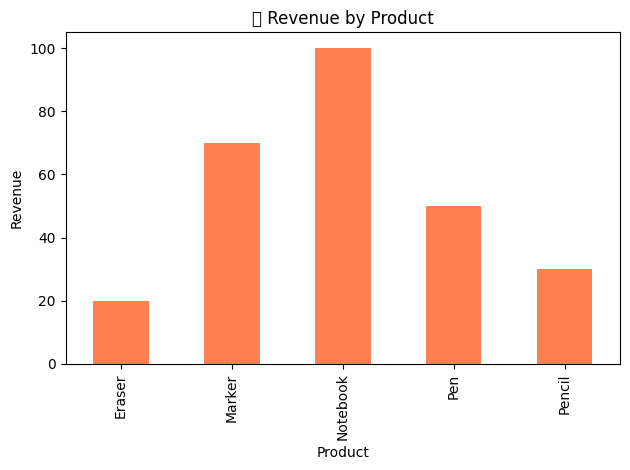

In [1]:
# 📊 Task 7: Basic Sales Summary using SQLite & Python

# ✅ Step 1: Import Required Libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

# ✅ Step 2: Connect to SQLite Database (creates it if not exists)
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# ✅ Step 3: Create the Sales Table (only if it doesn't already exist)
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# ✅ Step 4: Insert Sample Sales Data (skip if already inserted)
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    sample_data = [
        ('Pen', 10, 5.0),
        ('Notebook', 5, 20.0),
        ('Pencil', 15, 2.0),
        ('Eraser', 20, 1.0),
        ('Marker', 7, 10.0)
    ]
    cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
    conn.commit()

# ✅ Step 5: Query to Get Sales Summary
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

# ✅ Step 6: Print the DataFrame
print("📦 Sales Summary Table")
display(df)

# ✅ step 7: Bar Chart without emoji warnings
plt.figure(figsize=(8,5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='coral')
plt.title("Revenue by Product")  # Clean title without emoji
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

# ✅ Step 8: Close the Connection
conn.close()
